In [1]:
'''
Create model to predict percent winner bewteen two pokemon
'''
import os

part = "D:\\learn\\VTC Academy\\VTCA AI Specialist (HCM)\\TonyD\\Lesson 4 - Pokemon"
os.chdir(part)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, Image

import warnings
warnings.filterwarnings('ignore')

In [3]:
pokemon_data = pd.read_csv('pokemon.csv')
combat_data = pd.read_csv('combats.csv')

display(pokemon_data.shape)
display(combat_data.shape)

display(pokemon_data.head())
display(combat_data.head())


(800, 12)

(50000, 3)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


# Data Exploring

In [4]:
print(pokemon_data.isnull().sum())
print('====================')
print(combat_data.isnull().sum())

#               0
Name            1
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64
First_pokemon     0
Second_pokemon    0
Winner            0
dtype: int64


In [5]:
# check row with name null
pokemon_data[pokemon_data['Name'].isnull()]
idx_null = pokemon_data[pokemon_data['Name'].isnull()].index[0]

display(pokemon_data[idx_null-2:idx_null+2])

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
60,61,Golduck,Water,NaN,80,82,78,95,80,85,1,False
61,62,Mankey,Fighting,NaN,40,80,35,35,45,70,1,False
62,63,NaN,Fighting,NaN,65,105,60,60,70,95,1,False
63,64,Growlithe,Fire,NaN,55,70,45,70,50,60,1,False


In [6]:
# Check name null in https://pokemondb.net/pokedex/all => name is 'Primeape'

# Check again in pokemon_data
display(pokemon_data[pokemon_data["Name"] == 'Primeape'])

# Replace name null with 'Primeape'
pokemon_data.loc[idx_null, 'Name'] = 'Primeape'

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary


In [7]:
pokemon_data["Name"].value_counts()
# Trùng bình thuwòng vì con này phân ra đực và cái

Nidoran      2
Bulbasaur    1
Uxie         1
Probopass    1
Dusknoir     1
            ..
Ho-oh        1
Celebi       1
Treecko      1
Grovyle      1
Volcanion    1
Name: Name, Length: 799, dtype: int64

In [8]:
# check null again
print(pokemon_data.isnull().sum())
print('====================')
print(combat_data.isnull().sum())

#               0
Name            0
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64
First_pokemon     0
Second_pokemon    0
Winner            0
dtype: int64


In [9]:
WinStatsDF = pd.DataFrame(columns=['Pokedex','Total_Fight', 'Total_Wins', 'Win_Percent'])
WinStatsDF

,Pokedex,Total_Fight,Total_Wins,Win_Percent


In [10]:
# WinnwerCountSeries = combat_data['Winner'].value_counts()
# WinnwerCountSeries.sort_index(inplace=True)
# WinStatsDF['Pokedex'] = WinnwerCountSeries.index
# WinStatsDF['Total_Wins'] = WinnwerCountSeries.values
# display(WinnwerCountSeries)

In [11]:
TotalFightSeries = combat_data['First_pokemon'].value_counts() + combat_data['Second_pokemon'].value_counts()
TotalFightSeries.sort_index(inplace=True)
display(TotalFightSeries)

1      133
2      121
3      132
4      125
5      112
      ... 
796    105
797    131
798    119
799    144
800    121
Length: 784, dtype: int64

In [12]:
# # Pokedex is not equal index of TotalFightSeries

# # Check
# check1 = combat_data[combat_data['First_pokemon'] == combat_data['Second_pokemon']]
# display(check1)

# # Check Pokedex not in pokemon_data 
# A = set(TotalFightSeries.index)
# B = set(WinStatsDF['Pokedex'])
# display(len(A))
# display(len(B))
# # Find Pokedex not in pokemon_data
# display(A-B)

In [13]:
display(combat_data[combat_data['Winner'] == 231])
# Pokedex 231 not in pokemon_data because it isn't win any fight
# Take Pokedex from TotalFightSeries

# Pokedex and Total_Fight
WinStatsDF['Pokedex'] = TotalFightSeries.index
WinStatsDF['Total_Fight'] = TotalFightSeries.values

# Total_Wins
WinnwerCountSeries = combat_data['Winner'].value_counts().sort_index()
WinStatsDF['Total_Wins'] = WinStatsDF['Pokedex'].apply(lambda idx: WinnwerCountSeries[idx] if idx in WinnwerCountSeries.index else 0)
# or we can use concat
# WinStatsDF = pd.concat([WinStatsDF, WinnwerCountSeries], axis=1, join='inner')

# Win_Percent
WinStatsDF['Win_Percent'] = WinStatsDF['Total_Wins'] / WinStatsDF['Total_Fight']

display(WinStatsDF)

,First_pokemon,Second_pokemon,Winner


,Pokedex,Total_Fight,Total_Wins,Win_Percent
0,1,133,37,0.278195
1,2,121,46,0.380165
2,3,132,89,0.674242
3,4,125,70,0.560000
4,5,112,55,0.491071
...,...,...,...,...
779,796,105,39,0.371429
780,797,131,116,0.885496
781,798,119,60,0.504202
782,799,144,89,0.618056


In [14]:
# Merge pokemon_data and WinStatsDF by Pokedex
# how='left' because we want to keep all pokemon_data, if have Pokedex not in WinStatsDF, it will be NaN
pokemon_data_left = pd.merge(pokemon_data, WinStatsDF, right_on='Pokedex', left_on='#', how='left')
display(pokemon_data_left.head())

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Pokedex,Total_Fight,Total_Wins,Win_Percent
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,1.0,133.0,37.0,0.278195
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,2.0,121.0,46.0,0.380165
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,3.0,132.0,89.0,0.674242
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,4.0,125.0,70.0,0.560000
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,5.0,112.0,55.0,0.491071


In [15]:
display(pokemon_data_left)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Pokedex,Total_Fight,Total_Wins,Win_Percent
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,1.0,133.0,37.0,0.278195
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,2.0,121.0,46.0,0.380165
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,3.0,132.0,89.0,0.674242
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,4.0,125.0,70.0,0.560000
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,5.0,112.0,55.0,0.491071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,796.0,105.0,39.0,0.371429
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True,797.0,131.0,116.0,0.885496
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,798.0,119.0,60.0,0.504202
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True,799.0,144.0,89.0,0.618056


In [16]:
pokemon_data_left[pokemon_data_left['Win_Percent'].isnull()]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Pokedex,Total_Fight,Total_Wins,Win_Percent
11,12,Blastoise,Water,NaN,79,83,100,85,105,78,1,False,NaN,NaN,NaN,NaN
32,33,Sandshrew,Ground,NaN,50,75,85,20,30,40,1,False,NaN,NaN,NaN,NaN
45,46,Wigglytuff,Normal,Fairy,140,70,45,85,50,45,1,False,NaN,NaN,NaN,NaN
65,66,Poliwag,Water,NaN,40,50,40,40,40,90,1,False,NaN,NaN,NaN,NaN
77,78,Victreebel,Grass,Poison,80,105,65,100,70,70,1,False,NaN,NaN,NaN,NaN
89,90,Magneton,Electric,Steel,50,60,95,120,70,70,1,False,NaN,NaN,NaN,NaN
143,144,Ditto,Normal,NaN,48,48,48,48,48,48,1,False,NaN,NaN,NaN,NaN
182,183,Ariados,Bug,Poison,70,90,70,60,60,40,2,False,NaN,NaN,NaN,NaN
235,236,Ursaring,Normal,NaN,90,130,75,75,75,55,2,False,NaN,NaN,NaN,NaN
321,322,Hariyama,Fighting,NaN,144,120,60,40,60,50,3,False,NaN,NaN,NaN,NaN


In [17]:
# how='inner' because we want to keep only Pokedex in WinStatsDF, if have Pokedex not in WinStatsDF, it will be drop
pokemon_data_inner = pd.merge(pokemon_data, WinStatsDF, right_on='Pokedex', left_on='#', how='inner')
display(pokemon_data_inner)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Pokedex,Total_Fight,Total_Wins,Win_Percent
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,1,133,37,0.278195
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,2,121,46,0.380165
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,3,132,89,0.674242
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,4,125,70,0.560000
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,5,112,55,0.491071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,796,105,39,0.371429
780,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True,797,131,116,0.885496
781,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,798,119,60,0.504202
782,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True,799,144,89,0.618056


# Data Visualize (Hiểu về data)

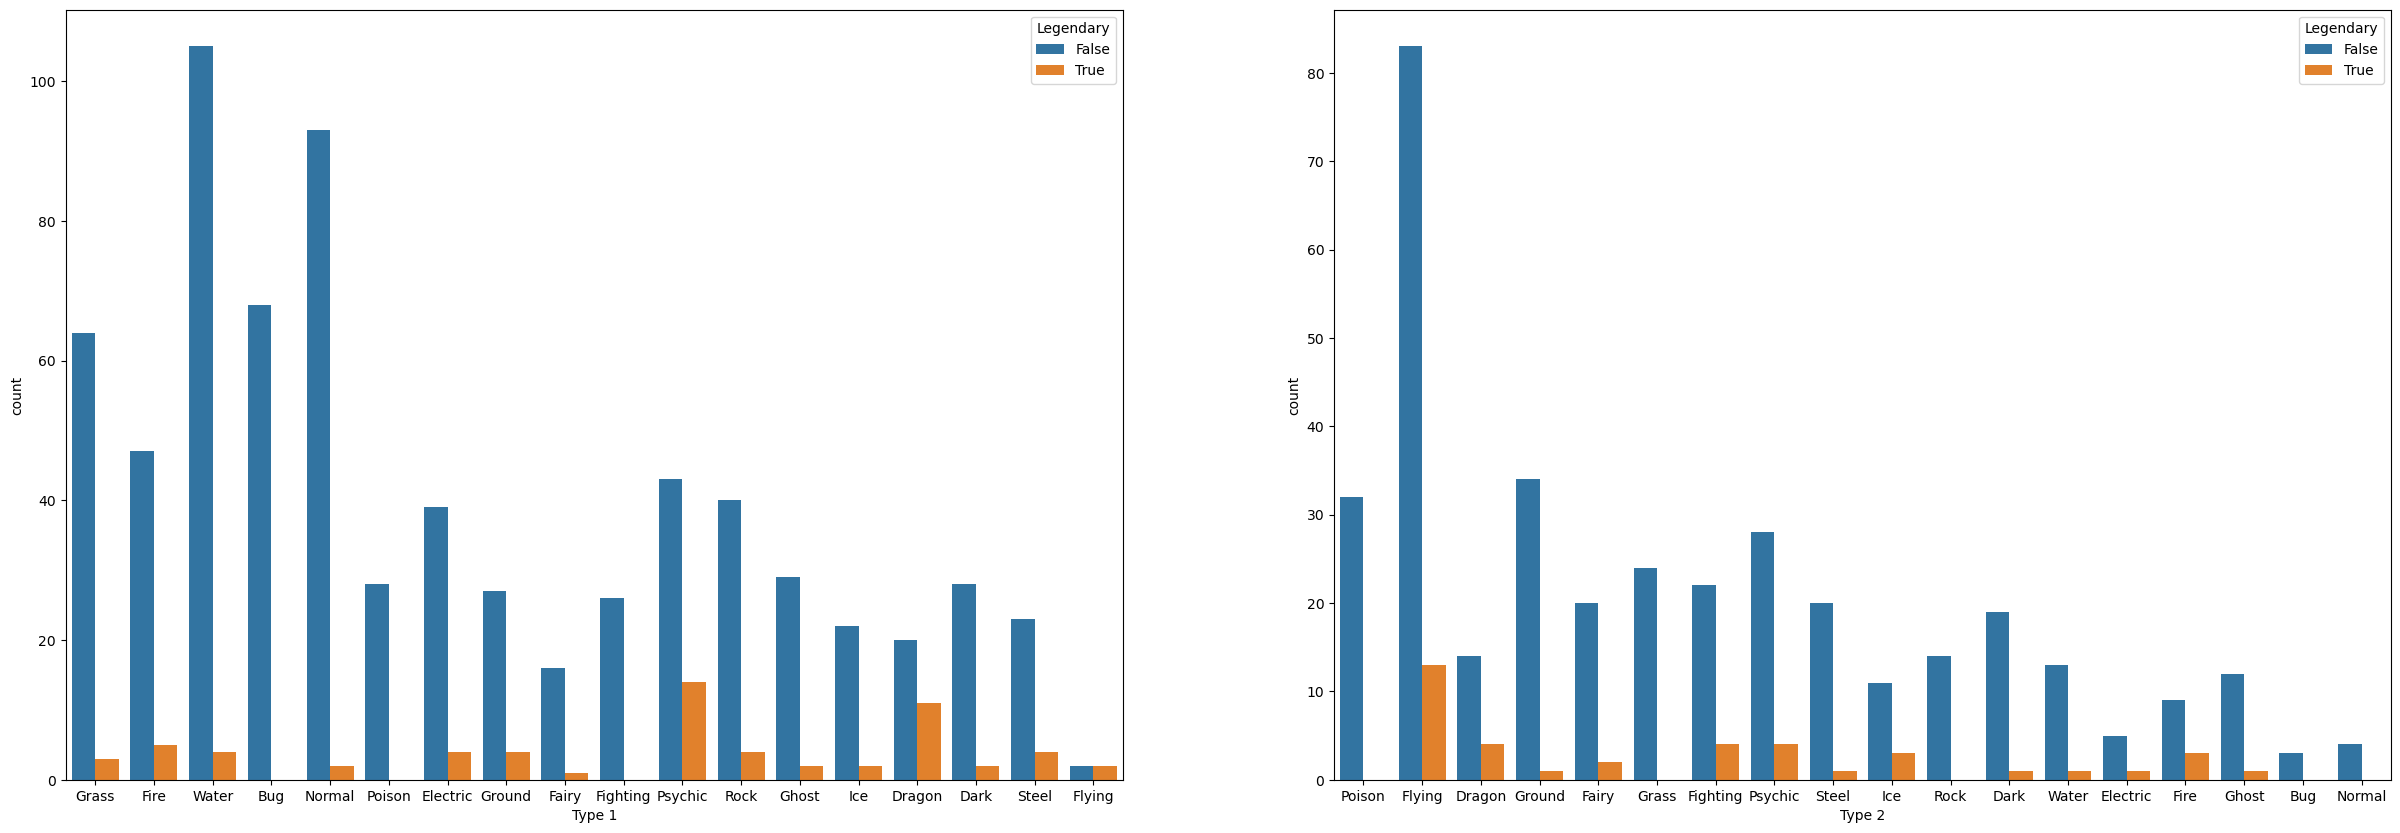

In [18]:
# draw 2 plot type 1 vs Total of Legendary and type 2 vs Total of Legendary in one plot
fig, ax = plt.subplots(1,2, figsize=(30,10))
sns.countplot(x='Type 1', hue='Legendary' , data=pokemon_data_inner, ax=ax[0])
sns.countplot(x='Type 2', hue='Legendary' , data=pokemon_data_inner, ax=ax[1])
plt.show()

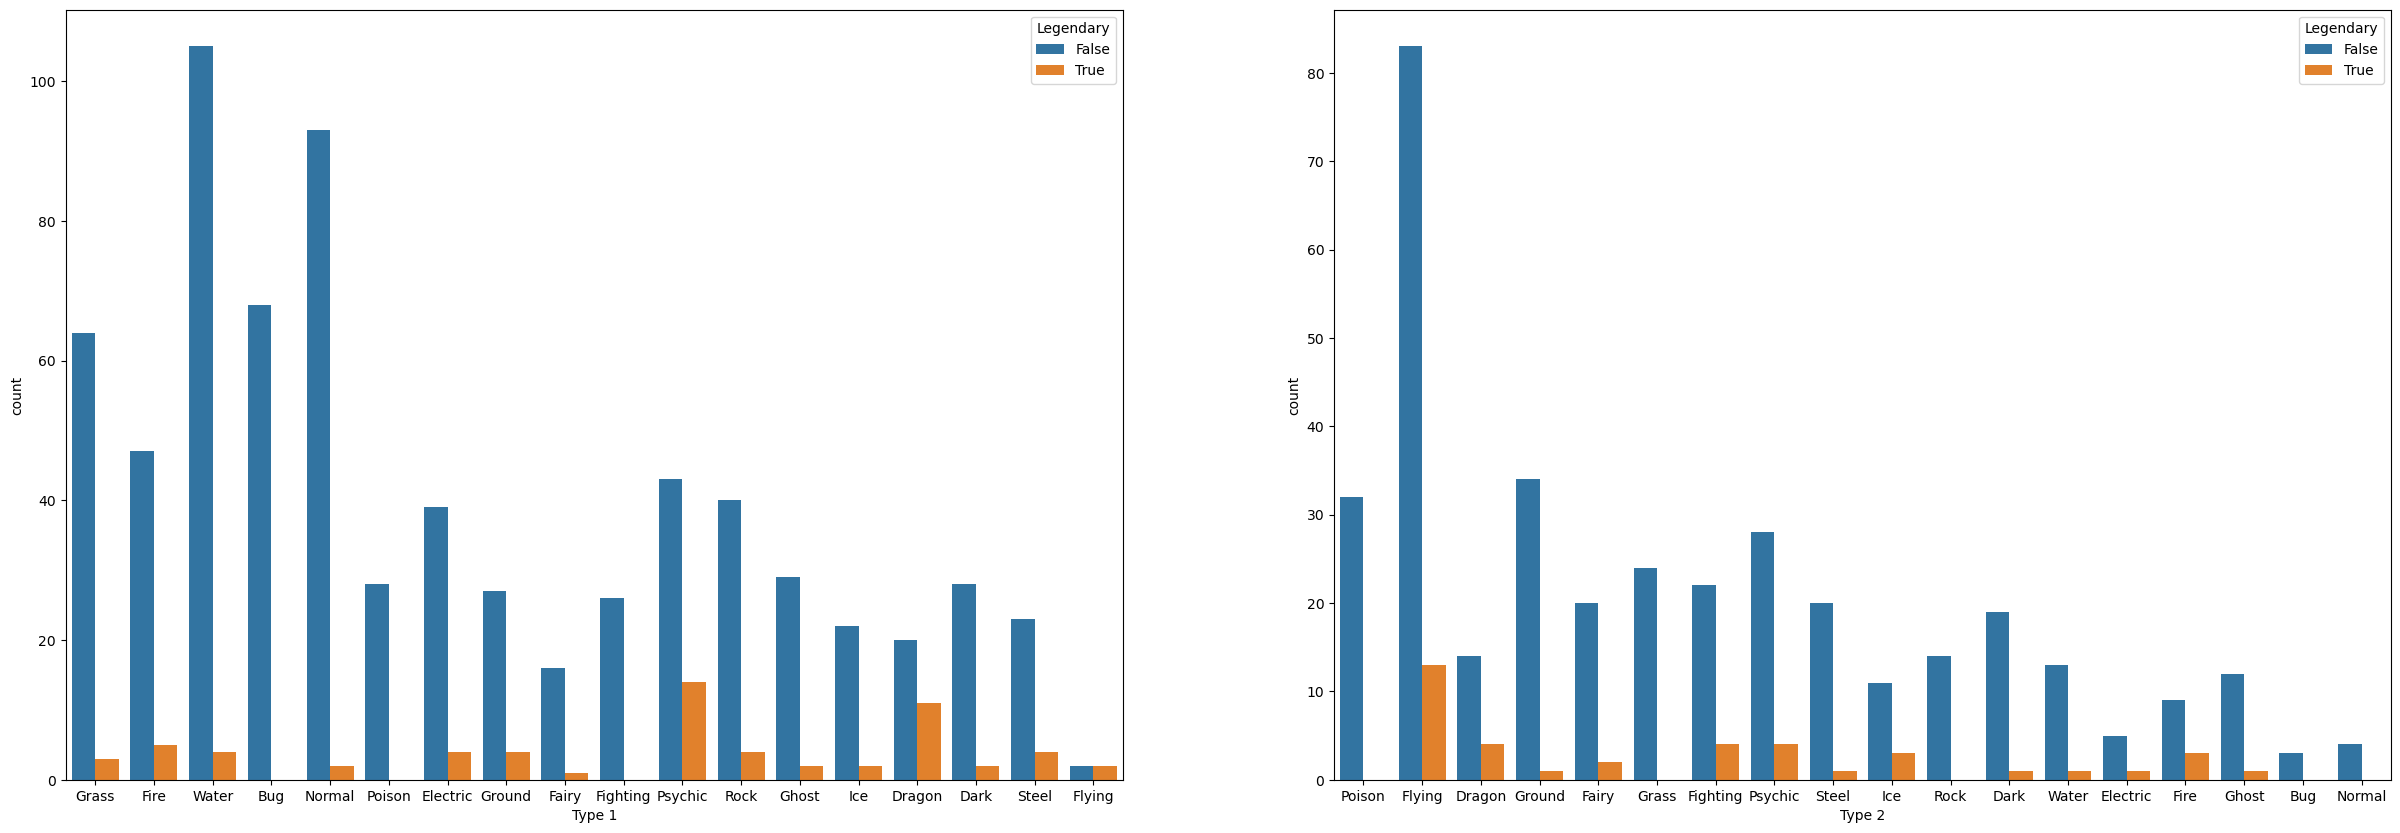

In [19]:
# visualize Type 1 and Type 2 vs Total of Legendary
fig, ax = plt.subplots(1,2, figsize=(30,10))
sns.countplot(x='Type 1', hue='Legendary' , data=pokemon_data_inner, ax=ax[0])
sns.countplot(x='Type 2', hue='Legendary' , data=pokemon_data_inner, ax=ax[1])
plt.show()

In [20]:
'''
Nhận xét:
    - Dữ liệu bị mất cân bằng. dùng cross validation để đánh giá model
'''

'\nNhận xét:\n    - Dữ liệu bị mất cân bằng. dùng cross validation để đánh giá model\n'

In [21]:
result = pokemon_data_inner[pokemon_data_inner["Legendary"] == True]
result

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Pokedex,Total_Fight,Total_Wins,Win_Percent
149,157,Articuno,Ice,Flying,90,85,100,95,125,85,1,True,157,139,95,0.683453
150,158,Zapdos,Electric,Flying,90,90,85,125,90,100,1,True,158,121,93,0.768595
151,159,Moltres,Fire,Flying,90,100,90,125,85,90,1,True,159,136,100,0.735294
155,163,Mewtwo,Psychic,NaN,106,110,90,154,90,130,1,True,163,164,152,0.926829
156,164,Mega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,1,True,164,135,125,0.925926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,796,105,39,0.371429
780,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True,797,131,116,0.885496
781,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,798,119,60,0.504202
782,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True,799,144,89,0.618056


In [22]:
table = pd.crosstab(index=pokemon_data_inner["Type 1"], columns=pokemon_data_inner["Type 2"].fillna("N/A"))
table

Type 2,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,N/A,Normal,Poison,Psychic,Rock,Steel,Water
Type 1,,,,,,,,,,,,,,,,,,,
Bug,0,0,0,2,0,2,2,14,1,6,2,0,17,0,11,0,3,7,1
Dark,0,0,3,0,0,2,3,4,2,0,0,2,10,0,0,2,0,2,0
Dragon,0,0,0,1,1,0,1,6,0,0,5,3,11,0,0,3,0,0,0
Electric,0,0,1,0,1,0,1,5,1,1,0,1,27,2,0,0,0,2,1
Fairy,0,0,0,0,0,0,0,2,0,0,0,0,15,0,0,0,0,0,0
Fighting,0,1,0,0,0,0,0,1,0,0,0,0,19,0,0,3,0,2,0
Fire,0,0,1,0,0,7,0,6,0,0,3,0,28,2,0,2,1,1,1
Flying,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0
Ghost,0,1,2,0,0,0,3,2,0,9,0,0,10,0,4,0,0,0,0


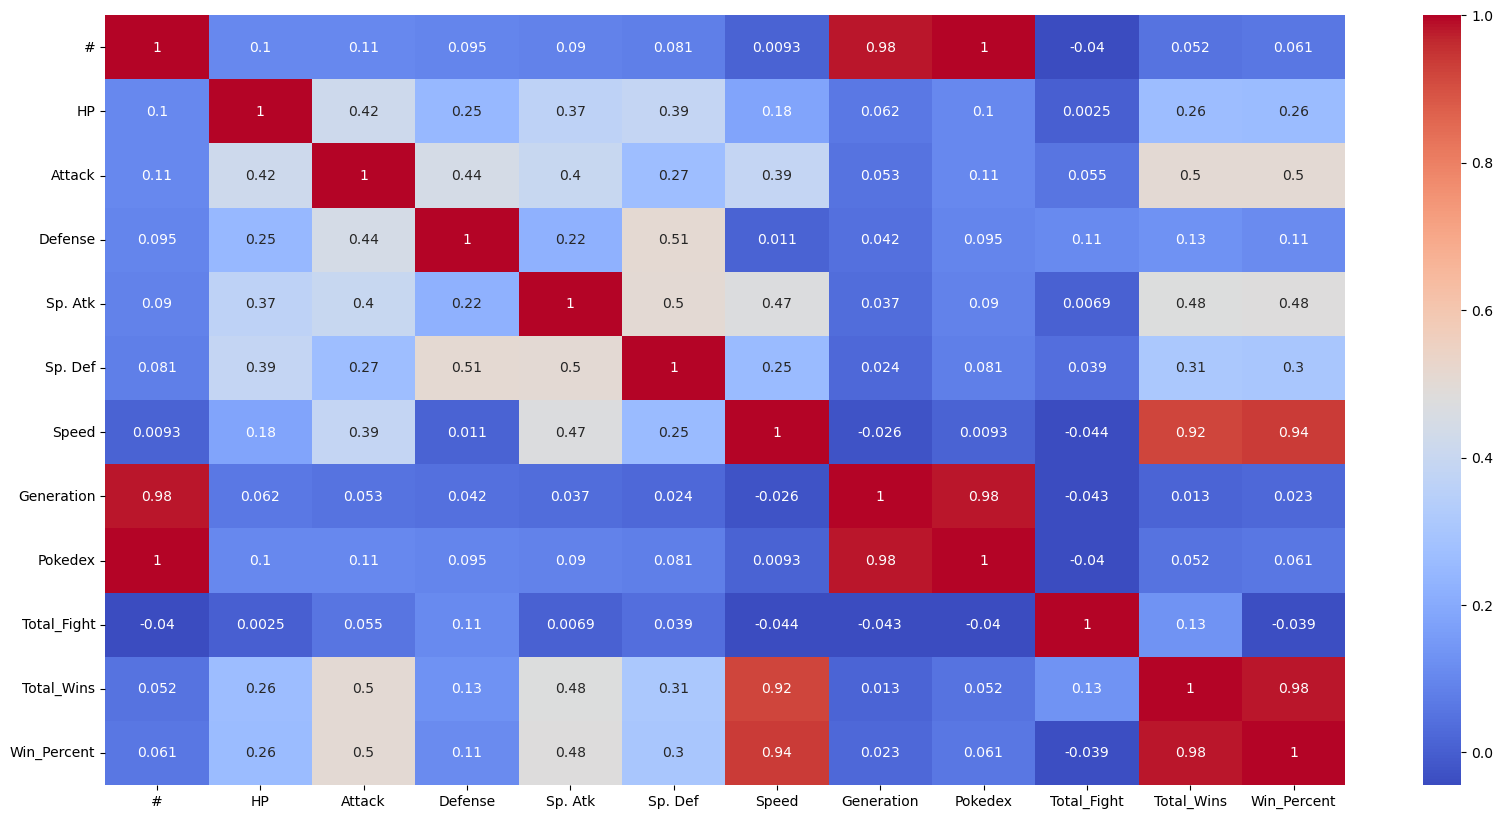

In [23]:
num_col = pokemon_data_inner.select_dtypes(include=np.number).columns
# find correlation between columns
corr = pokemon_data_inner[num_col].corr()

# visualize correlation
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

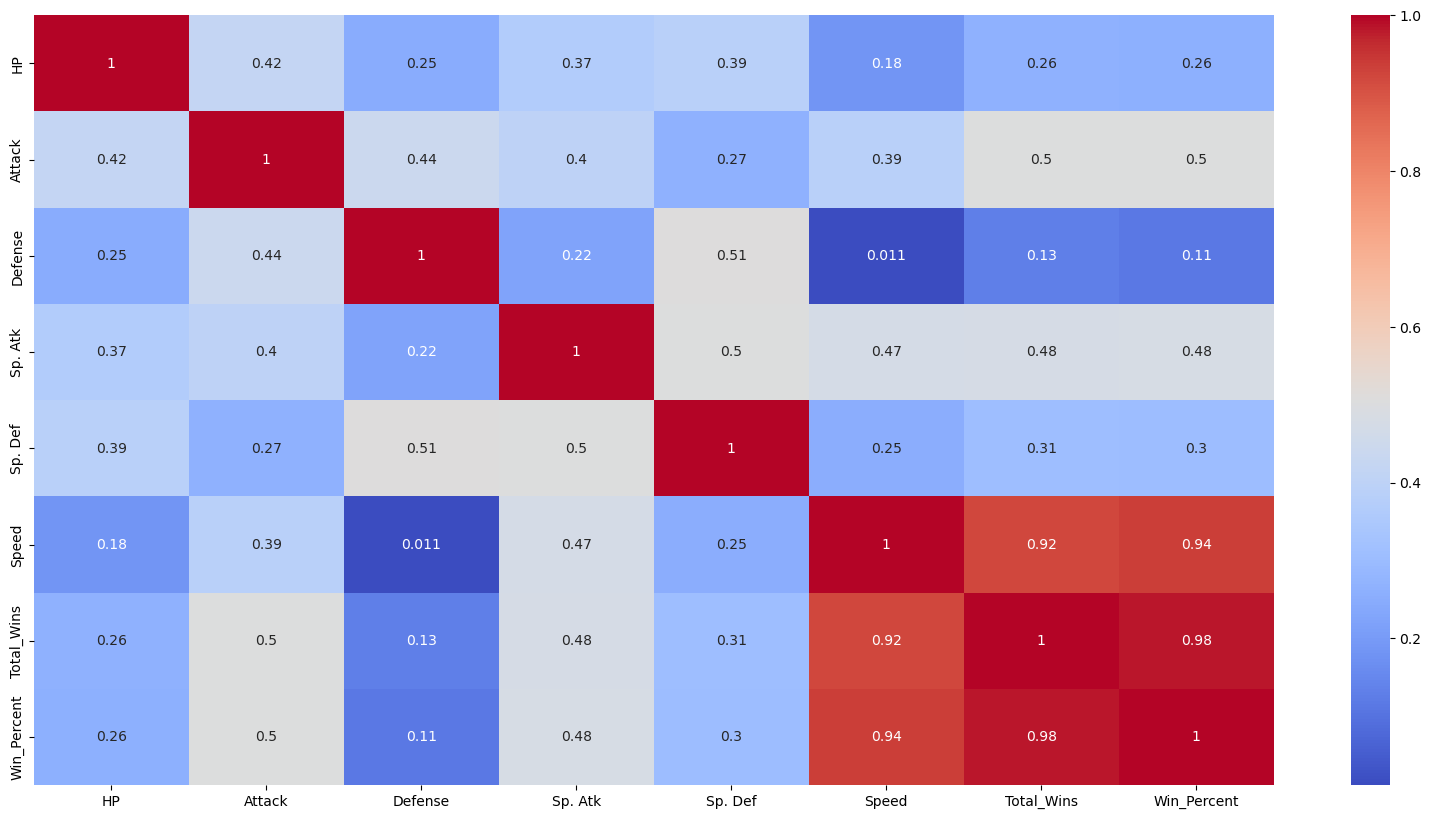

In [24]:
# get column have corr > 0.1 in Win_Percent
select_col = corr[abs(corr['Win_Percent']) > 0.1]['Win_Percent']

# visualize correlation
plt.figure(figsize=(20,10))
sns.heatmap(pokemon_data_inner[select_col.index].corr(), annot=True, cmap='coolwarm')
plt.show()

In [25]:
# increase corr Defence vs Win_Percent: Using add feature Attack + Defence
result2 = pokemon_data_inner[select_col.index]
result2['Attack_Defence'] = result2['Attack'] + result2['Defense']
display(result2.corr().style.background_gradient(cmap='coolwarm'))

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Total_Wins,Win_Percent,Attack_Defence
HP,1.000000,0.420464,0.248069,0.366261,0.385570,0.183813,0.263418,0.261602,0.395517
Attack,0.420464,1.000000,0.442344,0.398339,0.265884,0.385933,0.504848,0.502825,0.855395
Defense,0.248069,0.442344,1.000000,0.221042,0.508399,0.011475,0.127707,0.114565,0.842923
Sp. Atk,0.366261,0.398339,0.221042,1.000000,0.503077,0.473344,0.476610,0.481445,0.366634
Sp. Def,0.385570,0.265884,0.508399,0.503077,1.000000,0.254372,0.306554,0.302422,0.453137
Speed,0.183813,0.385933,0.011475,0.473344,0.254372,1.000000,0.918941,0.938055,0.238155
Total_Wins,0.263418,0.504848,0.127707,0.476610,0.306554,0.918941,1.000000,0.980962,0.376625
Win_Percent,0.261602,0.502825,0.114565,0.481445,0.302422,0.938055,0.980962,1.000000,0.367821
Attack_Defence,0.395517,0.855395,0.842923,0.366634,0.453137,0.238155,0.376625,0.367821,1.000000


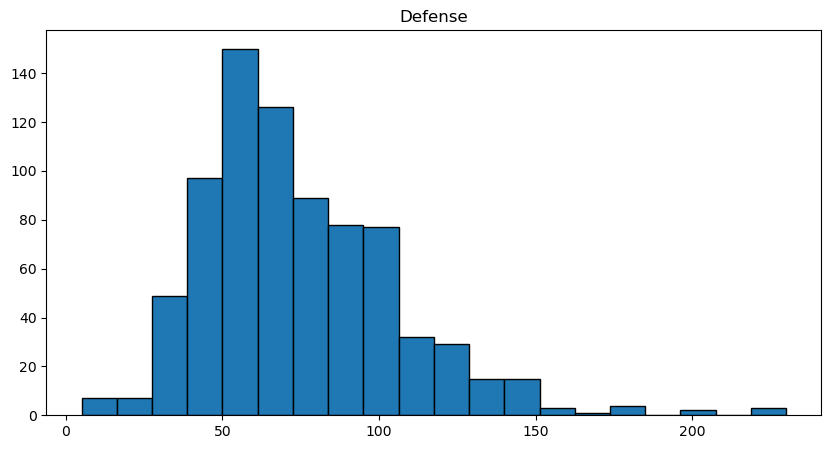

In [26]:
col = 'Defense'
plt.figure(figsize=(10,5))
plt.title(col)
hist = plt.hist(result2[col], ec='black', bins=20)
plt.show()

In [27]:
hist

(array([  7.,   7.,  49.,  97., 150., 126.,  89.,  78.,  77.,  32.,  29.,
         15.,  15.,   3.,   1.,   4.,   0.,   2.,   0.,   3.]),
 array([  5.  ,  16.25,  27.5 ,  38.75,  50.  ,  61.25,  72.5 ,  83.75,
         95.  , 106.25, 117.5 , 128.75, 140.  , 151.25, 162.5 , 173.75,
        185.  , 196.25, 207.5 , 218.75, 230.  ]),
 <BarContainer object of 20 artists>)

In [28]:
# increase corr Defence vs Win_Percent: Using Adaptive Binning
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
result3 = pokemon_data_inner.copy()
bins = [5, 28, 50, 73, 106, 151, 230]
arr = result2[col]
result3[col+'_q_Apt'] = pd.cut(arr, bins)

# Numerical convert
result3[col+'_en_Apt'] = enc.fit_transform(result3[col+'_q_Apt'])

display(result3)
display(result3.corr().style.background_gradient(cmap='coolwarm'))


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Pokedex,Total_Fight,Total_Wins,Win_Percent,Defense_q_Apt,Defense_en_Apt
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,1,133,37,0.278195,"(28, 50]",1
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,2,121,46,0.380165,"(50, 73]",2
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,3,132,89,0.674242,"(73, 106]",3
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,4,125,70,0.560000,"(106, 151]",4
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,5,112,55,0.491071,"(28, 50]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,796,105,39,0.371429,"(106, 151]",4
780,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True,797,131,116,0.885496,"(106, 151]",4
781,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,798,119,60,0.504202,"(50, 73]",2
782,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True,799,144,89,0.618056,"(50, 73]",2


,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Pokedex,Total_Fight,Total_Wins,Win_Percent,Defense_en_Apt
#,1.000000,0.103511,0.105296,0.095125,0.089596,0.081203,0.009309,0.983282,0.154566,1.000000,-0.040250,0.052436,0.061200,0.088547
HP,0.103511,1.000000,0.420464,0.248069,0.366261,0.385570,0.183813,0.062361,0.280315,0.103511,0.002483,0.263418,0.261602,0.355080
Attack,0.105296,0.420464,1.000000,0.442344,0.398339,0.265884,0.385933,0.052824,0.348178,0.105296,0.054517,0.504848,0.502825,0.434391
Defense,0.095125,0.248069,0.442344,1.000000,0.221042,0.508399,0.011475,0.042117,0.242051,0.095125,0.106995,0.127707,0.114565,0.897577
Sp. Atk,0.089596,0.366261,0.398339,0.221042,1.000000,0.503077,0.473344,0.036614,0.447989,0.089596,0.006895,0.476610,0.481445,0.242424
Sp. Def,0.081203,0.385570,0.265884,0.508399,0.503077,1.000000,0.254372,0.023787,0.357186,0.081203,0.038773,0.306554,0.302422,0.519036
Speed,0.009309,0.183813,0.385933,0.011475,0.473344,0.254372,1.000000,-0.026175,0.323255,0.009309,-0.044269,0.918941,0.938055,0.068832
Generation,0.983282,0.062361,0.052824,0.042117,0.036614,0.023787,-0.026175,1.000000,0.079847,0.983282,-0.043390,0.013198,0.022987,0.034962
Legendary,0.154566,0.280315,0.348178,0.242051,0.447989,0.357186,0.323255,0.079847,1.000000,0.154566,0.010120,0.324393,0.324935,0.221437
Pokedex,1.000000,0.103511,0.105296,0.095125,0.089596,0.081203,0.009309,0.983282,0.154566,1.000000,-0.040250,0.052436,0.061200,0.088547


In [29]:
# increase corr Defence vs Win_Percent: Using auto Binning
col = 'Defense'
for i in range(2, 8):
    result3[col+'_q_Auto'+str(i)] = pd.qcut(result3[col], q=i)
    result3[col+'_en_Auto'+str(i)] = enc.fit_transform(result3[col+'_q_Auto'+str(i)])

display(result3)
display(result3.corr().style.background_gradient(cmap='coolwarm'))

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,...,Defense_q_Auto3,Defense_en_Auto3,Defense_q_Auto4,Defense_en_Auto4,Defense_q_Auto5,Defense_en_Auto5,Defense_q_Auto6,Defense_en_Auto6,Defense_q_Auto7,Defense_en_Auto7
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,...,"(4.999, 58.0]",0,"(4.999, 50.0]",0,"(48.0, 62.0]",1,"(45.0, 58.0]",1,"(44.0, 55.0]",1
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,...,"(58.0, 83.0]",1,"(50.0, 70.0]",1,"(62.0, 77.0]",2,"(58.0, 70.0]",2,"(55.0, 65.0]",2
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,...,"(58.0, 83.0]",1,"(70.0, 90.0]",2,"(77.0, 95.0]",3,"(70.0, 83.0]",3,"(75.0, 87.286]",4
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,...,"(83.0, 230.0]",2,"(90.0, 230.0]",3,"(95.0, 230.0]",4,"(100.0, 230.0]",5,"(105.0, 230.0]",6
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,...,"(4.999, 58.0]",0,"(4.999, 50.0]",0,"(4.999, 48.0]",0,"(4.999, 45.0]",0,"(4.999, 44.0]",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,796,Diancie,Rock,Fairy,50,100,150,100,150,50,...,"(83.0, 230.0]",2,"(90.0, 230.0]",3,"(95.0, 230.0]",4,"(100.0, 230.0]",5,"(105.0, 230.0]",6
780,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,...,"(83.0, 230.0]",2,"(90.0, 230.0]",3,"(95.0, 230.0]",4,"(100.0, 230.0]",5,"(105.0, 230.0]",6
781,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,...,"(58.0, 83.0]",1,"(50.0, 70.0]",1,"(48.0, 62.0]",1,"(58.0, 70.0]",2,"(55.0, 65.0]",2
782,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,...,"(58.0, 83.0]",1,"(50.0, 70.0]",1,"(48.0, 62.0]",1,"(58.0, 70.0]",2,"(55.0, 65.0]",2


,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Pokedex,Total_Fight,Total_Wins,Win_Percent,Defense_en_Apt,Defense_en_Auto2,Defense_en_Auto3,Defense_en_Auto4,Defense_en_Auto5,Defense_en_Auto6,Defense_en_Auto7
#,1.000000,0.103511,0.105296,0.095125,0.089596,0.081203,0.009309,0.983282,0.154566,1.000000,-0.040250,0.052436,0.061200,0.088547,0.088296,0.126733,0.100188,0.090609,0.125167,0.121239
HP,0.103511,1.000000,0.420464,0.248069,0.366261,0.385570,0.183813,0.062361,0.280315,0.103511,0.002483,0.263418,0.261602,0.355080,0.327819,0.321073,0.338734,0.339329,0.333705,0.336445
Attack,0.105296,0.420464,1.000000,0.442344,0.398339,0.265884,0.385933,0.052824,0.348178,0.105296,0.054517,0.504848,0.502825,0.434391,0.417128,0.480358,0.480243,0.489324,0.484711,0.494392
Defense,0.095125,0.248069,0.442344,1.000000,0.221042,0.508399,0.011475,0.042117,0.242051,0.095125,0.106995,0.127707,0.114565,0.897577,0.769341,0.848696,0.888690,0.898045,0.910994,0.916177
Sp. Atk,0.089596,0.366261,0.398339,0.221042,1.000000,0.503077,0.473344,0.036614,0.447989,0.089596,0.006895,0.476610,0.481445,0.242424,0.262921,0.314667,0.286757,0.310349,0.305074,0.311333
Sp. Def,0.081203,0.385570,0.265884,0.508399,0.503077,1.000000,0.254372,0.023787,0.357186,0.081203,0.038773,0.306554,0.302422,0.519036,0.457382,0.514998,0.524901,0.539323,0.537134,0.543805
Speed,0.009309,0.183813,0.385933,0.011475,0.473344,0.254372,1.000000,-0.026175,0.323255,0.009309,-0.044269,0.918941,0.938055,0.068832,0.072626,0.098391,0.088204,0.090282,0.080452,0.093489
Generation,0.983282,0.062361,0.052824,0.042117,0.036614,0.023787,-0.026175,1.000000,0.079847,0.983282,-0.043390,0.013198,0.022987,0.034962,0.035089,0.066449,0.042880,0.030689,0.065658,0.058588
Legendary,0.154566,0.280315,0.348178,0.242051,0.447989,0.357186,0.323255,0.079847,1.000000,0.154566,0.010120,0.324393,0.324935,0.221437,0.242696,0.275906,0.250266,0.261866,0.258611,0.272908
Pokedex,1.000000,0.103511,0.105296,0.095125,0.089596,0.081203,0.009309,0.983282,0.154566,1.000000,-0.040250,0.052436,0.061200,0.088547,0.088296,0.126733,0.100188,0.090609,0.125167,0.121239


In [34]:
dataset = result3.copy()
correlationDF = dataset.corr()

# choose correlation column with Win_Percent > 0.2
threshCorrelation = 0.2
WinPercentSeries = correlationDF['Win_Percent']
WinPercentSeries.drop(['Win_Percent', '#'], inplace=True)

trainCol = WinPercentSeries[abs(WinPercentSeries) > threshCorrelation].index
targetCol = 'Win_Percent'


# Training Model

In [42]:
X = dataset[trainCol]
y = dataset[targetCol]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

display(trainCol)

Index(['HP', 'Attack', 'Sp. Atk', 'Sp. Def', 'Speed', 'Legendary',
       'Total_Wins'],
      dtype='object')

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: ', regr.coef_)

# The mean squared error
print('Mean squared error: %.2f' % mean_absolute_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

# Explained Accuracy score:
print('Accuracy score: %.2f' % regr.score(X_test, y_test))

Coefficients:  [ 1.06949649e-04  2.77573975e-04 -7.10898320e-06  2.95781839e-05
  2.37220830e-03 -1.15570110e-02  5.52617996e-03]
Mean squared error: 0.03
Variance score: 0.97
Accuracy score: 0.97


In [44]:
from sklearn.tree import DecisionTreeRegressor

# Create Decision Tree Regressor object
regr = DecisionTreeRegressor(random_state=0)

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The mean squared error
print('Mean squared error: %.2f' % mean_absolute_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

# Explained Accuracy score:
print('Accuracy score: %.2f' % regr.score(X_test, y_test))

Mean squared error: 0.04
Variance score: 0.96
Accuracy score: 0.96


In [46]:
import xgboost as xgb

# Create XGB Regressor object
regr = xgb.XGBRegressor(n_estimators=100, learning_rate=0.08, random_state=0, gamma=0, subsample=0.75)

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The mean squared error
print('Mean squared error: %.2f' % mean_absolute_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

# Explained Accuracy score:
print('Accuracy score: %.2f' % regr.score(X_test, y_test))

Mean squared error: 0.03
Variance score: 0.98
Accuracy score: 0.98
